In [4]:
#Import Dependencies
%matplotlib inline
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

In [5]:
# Load dataset
df = pd.read_csv('timeseries_testv4alt.csv')
df.head()

,Year,Waitlist,Diabetes,Obesity,Overdose,Pct_O,Total_Adj
0,12/31/1995,17257,4.98,15,5.5,47.725561,17065
1,12/31/1996,17732,5.23,15,5.5,48.234830,17519
2,12/31/1997,18405,5.52,16,5.7,48.149959,18173
3,12/31/1998,19473,5.80,17,5.9,48.266831,19226
4,12/31/1999,21835,6.09,18,6.1,48.000916,21566


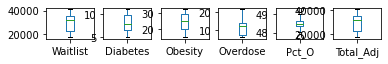

In [6]:
df.plot(kind='box', subplots=True, layout=(6,6), sharex=False, sharey=False)
plt.show()

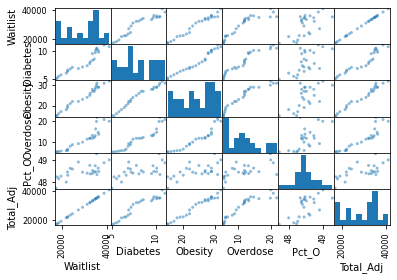

In [7]:
# scatter plot matrix
pd.plotting.scatter_matrix(df)
plt.show()

In [9]:
#Describe data
df.describe()

,Waitlist,Diabetes,Obesity,Overdose,Pct_O,Total_Adj
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,29413.360000,8.043600,24.160000,11.640000,48.495486,29157.520000
std,7234.193303,1.910264,5.390424,5.054453,0.324345,7218.461298
min,17257.000000,4.980000,15.000000,5.500000,47.725561,17065.000000
25%,22497.000000,6.620000,20.000000,6.800000,48.340966,22265.000000
50%,32371.000000,7.800000,25.000000,11.900000,48.453839,32060.000000
75%,35033.000000,9.810000,29.000000,13.800000,48.628091,34791.000000
max,41105.000000,11.090000,32.000000,21.700000,49.281419,40858.000000


In [10]:
#Assign variables for regression
X = df[['Diabetes','Obesity','Overdose','Pct_O']]
y = df['Total_Adj'].values.reshape(-1,1)
print(X.shape, y.shape)

(25, 4) (25, 1)


In [11]:
#Use train_test_split to create training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [12]:
#Create model
model = LinearRegression()

In [13]:
#fit the model to the training data and calculate the scores for the training and testing data
#Begin
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)
#End
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")


Training Score: 0.9821145469069239
Testing Score: 0.9536959965556824


Text(0.5, 1.0, 'Residual Plot')

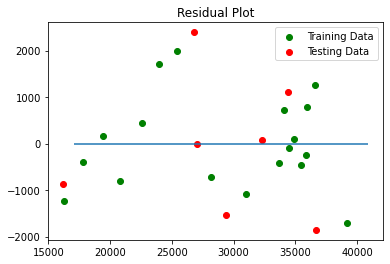

In [14]:
#Plot Residuals for Training and Testing Data
#Begin
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="green", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="red", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
#End

In [15]:
#R2 of original model
r_sq = model.score(X, y)
print('coefficient of determination', r_sq)

coefficient of determination 0.9754923265492258


In [16]:
print(model.intercept_)

[-33926.93880241]


In [17]:
print(model.coef_)

[[-893.60651758 1851.62912613 -286.19686559  594.71258729]]


In [18]:
#Make a Prediction using model
predictedTotal_Adj = model.predict([[11,29,20,49]])
print(predictedTotal_Adj)

[[33357.61362719]]


In [19]:
print(X_train.shape)

(18, 4)


In [20]:
print(y_train.shape)

(18, 1)


In [21]:
print(y_test.shape)

(7, 1)


In [22]:
print(X_test.shape)

(7, 4)


In [23]:
modeldetail = sm.OLS(y, X)
resultstest = modeldetail.fit()

In [24]:
print(X.shape)

(25, 4)


In [25]:
print(y.shape)

(25, 1)


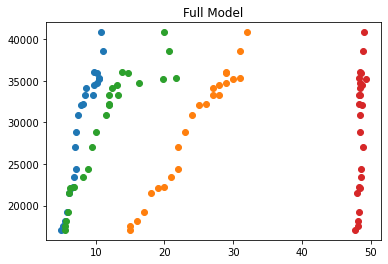

In [26]:
plt.scatter(X[('Diabetes')], y)
plt.scatter(X[('Obesity')], y)
plt.scatter(X[('Overdose')], y)
plt.scatter(X[('Pct_O')], y)
plt.title('Full Model')
plt.show()

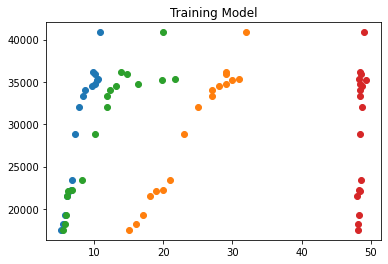

In [27]:
plt.scatter(X_train[('Diabetes')], y_train)
plt.scatter(X_train[('Obesity')], y_train)
plt.scatter(X_train[('Overdose')], y_train)
plt.scatter(X_train[('Pct_O')], y_train)
plt.title('Training Model')
plt.show()

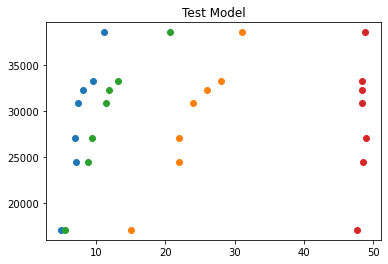

In [28]:
plt.scatter(X_test[('Diabetes')], y_test)
plt.scatter(X_test[('Obesity')], y_test)
plt.scatter(X_test[('Overdose')], y_test)
plt.scatter(X_test[('Pct_O')], y_test)
plt.title('Test Model')
plt.show()